https://medium.com/@aldimeolaalfarisy/hbo-max-recommendation-system-52dc0b59dc9b

In [22]:
# Import lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as osp



In [23]:
data_folder = "../../Datasets/HBO_Max_Recommendation_Datatset/"
titles_data = osp.join(data_folder, "titles.csv")
credits_data = osp.join(data_folder, "credits.csv")
titles_data = pd.read_csv(titles_data)
credits_data = pd.read_csv(credits_data)

In [24]:
print(credits_data.shape)
print(credits_data.head())


(66393, 5)
   person_id        id               name  \
0      60017  tm155702       Judy Garland   
1      53496  tm155702         Ray Bolger   
2      79549  tm155702         Jack Haley   
3      79548  tm155702          Bert Lahr   
4      60995  tm155702  Margaret Hamilton   

                                 character   role  
0                             Dorothy Gale  ACTOR  
1                         Hunk / Scarecrow  ACTOR  
2                        Hickory / Tin Man  ACTOR  
3                     Zeke / Cowardly Lion  ACTOR  
4  Elmira Gulch / Wicked Witch of the West  ACTOR  


In [25]:
print(titles_data.shape)
print(titles_data.head())

(3294, 15)
         id               title   type  \
0  tm155702    The Wizard of Oz  MOVIE   
1   tm83648        Citizen Kane  MOVIE   
2   tm77588          Casablanca  MOVIE   
3   tm82363       The Big Sleep  MOVIE   
4   tm84701  The Maltese Falcon  MOVIE   

                                         description  release_year  \
0  Young Dorothy finds herself in a magical world...          1939   
1  Newspaper magnate, Charles Foster Kane is take...          1941   
2  In Casablanca, Morocco in December 1941, a cyn...          1942   
3  Private Investigator Philip Marlowe is hired b...          1946   
4  A private detective takes on a case that invol...          1941   

  age_certification  runtime                            genres  \
0                 G      102             ['fantasy', 'family']   
1                PG      119                         ['drama']   
2                PG      102       ['drama', 'romance', 'war']   
3               NaN      116             ['thriller

In [26]:
print("available: ")
for col in titles_data.columns:
    print(col, end=", ")


available: 
id, title, type, description, release_year, age_certification, runtime, genres, production_countries, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, tmdb_score, 

In [31]:
data = titles_data[['title', 'description', 'type', 'release_year', 'age_certification', 'genres', 'imdb_score']]

In [32]:
# Clean genres column
data['genres'] = data['genres'].map(lambda x: x.strip("[]''"))
data['genres'] = data['genres'].str.replace("'","")

/tmp/ipykernel_27636/3228450322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genres'] = data['genres'].map(lambda x: x.strip("[]''"))
/tmp/ipykernel_27636/3228450322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genres'] = data['genres'].str.replace("'","")


MOVIE    2538
SHOW      756
Name: type, dtype: int64


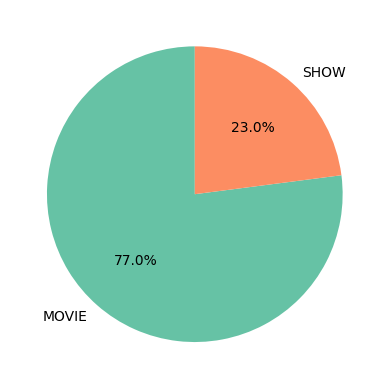

In [33]:
type_stat = data['type'].value_counts()
print(type_stat)
plt.pie(type_stat.values, labels=type_stat.keys(),
        startangle=90, autopct='%.1f%%', colors=plt.cm.Set2.colors)

plt.show()

In [34]:
print(data.keys())

Index(['title', 'description', 'type', 'release_year', 'age_certification',
       'genres', 'imdb_score'],
      dtype='object')


<class 'pandas.core.series.Series'>


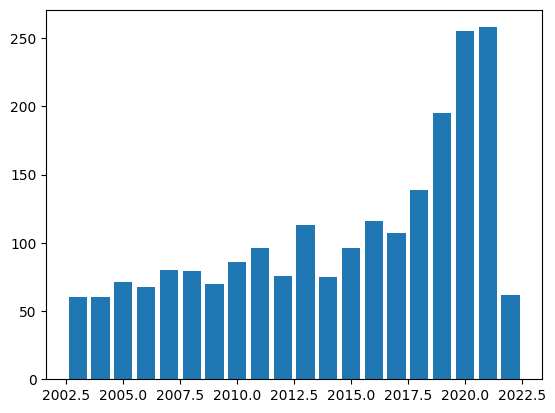

In [35]:
data['release_year'].value_counts()
data_release_year_stat = data['release_year'].value_counts()
print(type(data_release_year_stat))
plt.bar(data_release_year_stat.keys()[:20], data_release_year_stat.values[:20])
plt.show()

R        597
PG-13    470
TV-MA    313
PG       308
TV-14    146
TV-PG     84
G         83
TV-Y7     41
TV-G      20
TV-Y      17
NC-17      7
Name: age_certification, dtype: int64


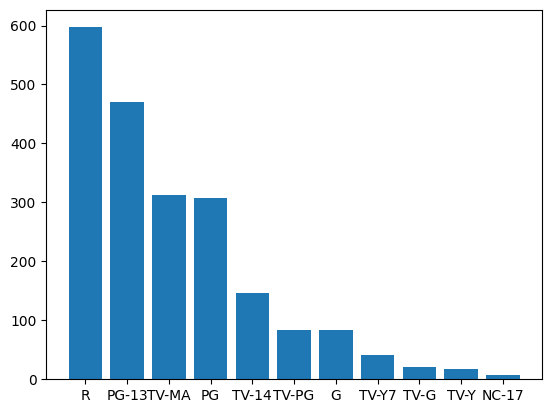

In [36]:
print(data['age_certification'].value_counts())
data_age_certification_stat = data['age_certification'].value_counts()
plt.bar(data_age_certification_stat.keys(), data_age_certification_stat.values)
plt.show()

In [37]:
data['imdb_score'] = data['imdb_score'].fillna(0)
top_10_score_indexes = np.argsort(np.array(data['imdb_score'].to_list()))[-10:]
print(top_10_score_indexes)
for idx, (title, score) in enumerate(zip(data['title'], data['imdb_score'])):
    if idx in top_10_score_indexes:
        print(title, score)

[1878  712  669 1706 2275  725 2330 1030 2531 1038]
Eyes on the Prize 9.2
The Sopranos 9.2
The Shawshank Redemption 9.3
The Wire 9.3
Band of Brothers 9.4
Game of Thrones 9.2
Rick and Morty 9.2
Emergency Contact 9.2
Lamput 9.3
Chernobyl 9.4


/tmp/ipykernel_27636/89167246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['imdb_score'] = data['imdb_score'].fillna(0)


In [38]:
# Import the needed libraries
from sklearn.feature_extraction import text
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thanhnv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
# Clean data title
data["title"] = data["title"].apply(clean)

/tmp/ipykernel_27636/3005383275.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["title"] = data["title"].apply(clean)


In [40]:
print(data.title.sample(20))

2393                impract joker parti
340                            tom jone
1593                            epitaph
2921                 amanda seal knowin
603                           ice pirat
2263                  wiener dog intern
3022        jerrod carmichael rothaniel
1953                               east
1361                          two lover
1350                             decept
1678       salt lake  stori olymp glori
600                           room view
154                        go hollywood
393                    masculin féminin
402                    shop main street
1790                         alex cross
3283                  marlon wayan know
1670    dark light art blind photograph
621                           stay aliv
679                        mighti quinn
Name: title, dtype: object


In [41]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
feature = data["genres"].tolist()
tfidf = text.TfidfVectorizer(input='content', stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

<class 'list'>


In [45]:
indices = pd.Series(data.index, index=data['title']).drop_duplicates()

In [46]:
def HBO_recommendation(title, similarity = similarity):
    index = indices[title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x:x[1], reverse=True)
    similarity_scores = similarity_scores[0:20]
    movieindices = [i[0] for i in similarity_scores]
    return data['title'].iloc[movieindices]

In [47]:
print(HBO_recommendation('day thunder'))

569                  day thunder
3140                las brava fc
476                 greas lightn
357                 fast compani
980                        tyson
1172                    wrestler
1180         million dollar babi
1335                     marshal
1413                       sugar
1808                        luck
1887                            
2996                king richard
3000                    survivor
1215                      switch
1439                    undisput
966     real sport bryant gumbel
1578            record bob costa
3087     game theori bomani jone
285            north dalla forti
1074                  eastbound 
Name: title, dtype: object
